## Problem Statement

In [5]:
# Prediction task is to determine the income level for the person
# Incomes have been below/above 50k

## Hypotheses Generation

In [6]:
# There exists significant impacts of the variables (below) on the dependent variable.

# Age
# Marital Status
# Family Members
# No. of Dependents
# Tax Paid
# Investment (Mutual Fund, Stock)
# Return from Investments
# Education
# Spouse Education
# Nationality
# Occupation
# Region in US
### Year started working (cycles of the U.S. economy)
# Race
# Occupation category

## EDA

#### Load the datasets

In [7]:
import pandas as pd

In [8]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df.shape

(199523, 41)

In [7]:
test_df.shape

(99762, 41)

In [8]:
train_df.head(3)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000


In [9]:
test_df.head(3)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000


In [1]:
# 2. scatter plot (How to separate different classes?)

Text(0.5,0,'age')

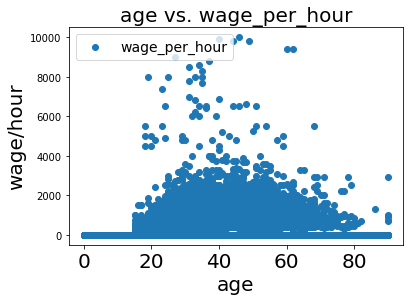

In [9]:
import matplotlib.pyplot as plt
# Setup matplotlib to display in notebook:
%matplotlib inline

plt.scatter(train_df.age, train_df.wage_per_hour)

plt.legend(fontsize=10)
plt.xticks(fontsize = 20)
plt.title('age vs. wage_per_hour', fontsize = 20)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.legend(loc = "upper left", fontsize = 14)
ax.set_ylabel("wage/hour", fontsize = 20)
ax.set_xlabel('age', fontsize = 20)

## Import the test dataset and training datasets obtained with various resampling techniques from the R file.

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score

In [2]:
orig_df = pd.read_csv("census_orig.csv")
rose_df = pd.read_csv("census_rose.csv")
smote_df = pd.read_csv("census_smote.csv")
under_df = pd.read_csv("census_under.csv")
over_df = pd.read_csv("census_over.csv")
test_df = pd.read_csv("test.csv")
orig_df.drop("Unnamed: 0", axis = 1, inplace = True)
rose_df.drop("Unnamed: 0", axis = 1, inplace = True)
smote_df.drop("Unnamed: 0", axis = 1, inplace = True)
under_df.drop("Unnamed: 0", axis = 1, inplace = True)
over_df.drop("Unnamed: 0", axis = 1, inplace = True)
test_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [3]:
test_df.income_level.value_counts()

0    93576
1     6186
Name: income_level, dtype: int64

### Train the Classifier

In [4]:
feature_list = orig_df.columns.values.tolist()

In [5]:
cat_feature_list = list(set(feature_list) - set(orig_df._get_numeric_data().columns.values.tolist()))

In [6]:
def get_dummy_func(df):
    df_new = df[['num_person_Worked_employer', 'year']]
    for category in cat_feature_list:
        series = df[category]
        dummies = pd.get_dummies(series, prefix=category)
        df_new = pd.concat([df_new, dummies], axis=1)
    return df_new

In [7]:
orig = get_dummy_func(orig_df)
under = get_dummy_func(under_df)
over = get_dummy_func(over_df)
smote = get_dummy_func(smote_df)
rose = get_dummy_func(rose_df)
test = get_dummy_func(test_df)

In [8]:
np.shape(test.values)

(99762, 104)

In [16]:
def do_cm_cr(model, X_train, y_train, X_test, y_test, names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     y_score = model.decision_function(X_test)
    y_proba_score = model.predict_proba(X_test)


    FPR, TPR, thresholds = roc_curve(y_test, y_proba_score[:,1])
    ROC_AUC_orig = auc(FPR, TPR)
    if ROC_AUC_orig > 0.5:
        ROC_AUC = ROC_AUC_orig
    else:
        print "Classifier Flipped"
        y_pred = 1 - y_pred
        y_proba_score = 1- y_proba_score
        ROC_AUC = 1 - ROC_AUC_orig
    
    print "AUC is:", ROC_AUC, "\n"

    print "Classification Report: \n", (classification_report(y_test, y_pred)), "\n"

    print "Confusion Matrix: \n"
    confmat = confusion_matrix(y_test, y_pred)
    idx = ['Negative', 'Positive']
    col = ['Predicted Negative', 'Predicted Positive']
    print pd.DataFrame(confmat, index=idx, columns=col), "\n"

    
    TN = confmat[0][0]
    FP = confmat[0][1]
    FN = confmat[1][0]
    TP = confmat[1][1]
    TPR = float(TP)/(TP+FN)
    TNR = float(TN)/(TN+FP)

    print "True Positive Rate is: %f" %TPR
    print "True Negative Rate is: %f" %TNR


In [17]:
logreg = LogisticRegression()
do_cm_cr(logreg, orig.values, orig_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC is: 0.931593009036 

Classification Report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     93576
          1       0.65      0.31      0.42      6186

avg / total       0.94      0.95      0.94     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               92573                1003
Positive                4294                1892 

True Positive Rate is: 0.305852
True Negative Rate is: 0.989281


In [24]:
(89-31)/float(89)

0.651685393258427

In [22]:
logreg = LogisticRegression()
do_cm_cr(logreg, rose.values, rose_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC is: 0.931567172096 

Classification Report: 
             precision    recall  f1-score   support

          0       0.99      0.83      0.90     93576
          1       0.25      0.89      0.39      6186

avg / total       0.95      0.83      0.87     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               77283               16293
Positive                 692                5494 

True Positive Rate is: 0.888134
True Negative Rate is: 0.825885


In [18]:
logreg = LogisticRegression()
do_cm_cr(logreg, smote.values, smote_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier Flipped
AUC is: 0.930312798716 

Classification Report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     93576
          1       0.65      0.31      0.42      6186

avg / total       0.94      0.95      0.94     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               92536                1040
Positive                4287                1899 

True Positive Rate is: 0.306984
True Negative Rate is: 0.988886


In [20]:
logreg = LogisticRegression()
do_cm_cr(logreg, under.values, under_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier Flipped
AUC is: 0.931453115381 

Classification Report: 
             precision    recall  f1-score   support

          0       0.99      0.87      0.92     93576
          1       0.29      0.83      0.44      6186

avg / total       0.94      0.87      0.89     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               81284               12292
Positive                1049                5137 

True Positive Rate is: 0.830424
True Negative Rate is: 0.868642


In [21]:
logreg = LogisticRegression()
do_cm_cr(logreg, over.values, over_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier Flipped
AUC is: 0.93159864683 

Classification Report: 
             precision    recall  f1-score   support

          0       0.99      0.83      0.90     93576
          1       0.25      0.89      0.39      6186

avg / total       0.95      0.83      0.87     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               77433               16143
Positive                 710                5476 

True Positive Rate is: 0.885225
True Negative Rate is: 0.827488
